32780
32190
32050
30820
28990
28310
27540
26860
24760
24560
24040
23830
23620
23440
23410
23410
23100
22910
22680
22680
22190
22190
21480
20900
20900
20590
20590
20480
20220
20230
20130
19790
19790
19790
19730
19565
19565
19565
19265
19265
19265
19265
19205
19205
19125
18825
18625
18435
18385
18385
18385
18385
18385
18385
18385
18105
18105
17685
17425
17425
17425
17425
17425
16935
16935
16935
16935
16765
16765
16765
16765
16345
16345
16345
16345
16345
16345
16315
16315
16315
16185
16185
16185
16095
16095
16095
16095
16095
15955
15695
15655
15655
15645
15500
15500
15285
15285
15265
15265
15265
15265
15265
15265
15265
15265
15265
15265
15265
15155
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
15065
Min route length: 15065


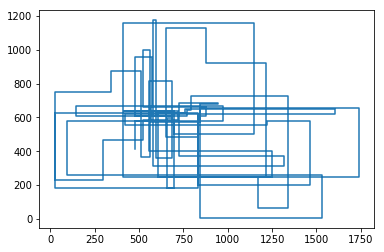

In [14]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from numpy.random import choice
import matplotlib.pyplot as plt
import random


df = pd.read_csv('tsp.csv', header=None, names = ['n', 'x', 'y'])


def dist(df, perm):
    m = df.shape[0]
    d=0
    for n in range(1, m):
        u = df.iloc[perm[n]]-df.iloc[perm[n-1]]
        d += abs(u.x)+abs(u.y)
    return d


def f(r):
    return max(math.sin(r/2)*300/r**0.7, 1)


def step(df, perm, r):
    d_list = []
    d_prob = []
    d_start = dist(df, perm)
    f_r = f(r)
    #print(f_r)
    d = random.randint(0, df.shape[0]-1)
    for m in range(0,df.shape[0]-1):
        a = perm.copy()
        a[m] = perm[d]
        a[d] = perm[m]
        d_list.append(a)
        d_prob.append(math.exp(min((d_start - dist(df, a))/f_r,700)))
    d_prob = [x/sum(d_prob) for x in d_prob]
    ch = choice(range(0,51), 1, p=d_prob)
    perm2 = d_list[ch[0]]
    return d_list[ch[0]]

    
d_list = []
perm = np.random.permutation(df.shape[0])
d_list.append([perm, dist(df, perm)])
cur_min = dist(df, perm)
k = 0
i = 1
while k<30:
    perm = step(df, perm, i)
    i+=1
    d_list.append([perm, dist(df, perm)])
    print(dist(df, perm))
    if dist(df, perm)<cur_min:
        k=0
        cur_min = dist(df, perm)
    else:
        k+=1
    
    
    
    
    
best_perm = min(d_list, key = lambda t: t[1])
print('Min route length: %s' %best_perm[1])

df2 = df
df2['perm'] = best_perm[0]*2

df2 = df2.set_index(df['perm']).drop(columns = ['perm'])

for k in range(1, 103, 2):
    df2.loc[k] = np.array([0,df2.loc[k+1,'x'],df2.loc[k-1,'y']])

df2 = df2.sort_index()

plt.plot(df2.x, df2.y)
plt.show()

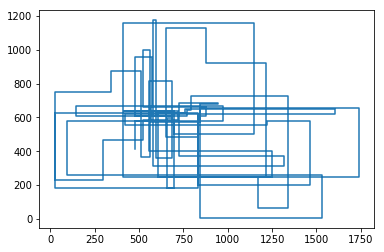

In [15]:
plt.plot(df2.x, df2.y)
plt.show()

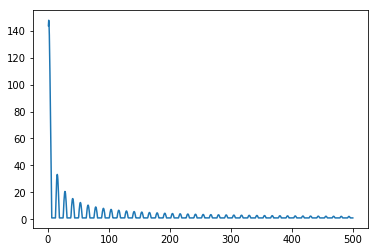

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

t = np.arange(1., 500., 0.5)
plt.plot(t, [max(math.sin(r/2)*300/r**0.8, 1) for r in t])
